In [ ]:
from logging import warning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df =pd.read_csv("/content/Algerian_forest_fires_dataset_UPDATE.csv", header = 1)

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [ ]:
df.shape

(246, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [ ]:
df[df.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [ ]:
df.loc[:122, "Region"] = 0
df.loc[122:, "Region"] = 1

In [ ]:
df[["Region"]] = df[["Region"]].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.0+ KB


In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df.shape

(246, 15)

In [ ]:
df[df.isnull().any(axis= 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1


In [ ]:
df = df.drop([122,123,167], axis = 0).reset_index(drop = True)

In [ ]:
df.iloc[122]

,122
day,01
month,06
year,2012
Temperature,32
RH,71
Ws,12
Rain,0.7
FFMC,57.1
DMC,2.5
DC,8.2


In [ ]:
df.shape

(243, 15)

In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4    RH          243 non-null    object
 5    Ws          243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [ ]:
objects = [features for features in df.columns if df[features].dtypes=="O"]

In [ ]:
for i in objects:
  if i!='Classes':
    df[i] = df[i].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [ ]:
df.to_csv("Algerian_forest_fires_dataset_cleaned.csv", index = False)

In [ ]:
df_copy2 = df

In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
df_copy2 = df_copy2.drop(['day', 'month', 'year'], axis = 1)

In [ ]:
df_copy2.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df_copy2['Classes'] = np.where(df_copy2['Classes'].str.contains('not fire'), 0, 1)

In [ ]:
df_copy2.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [ ]:
df_copy2['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


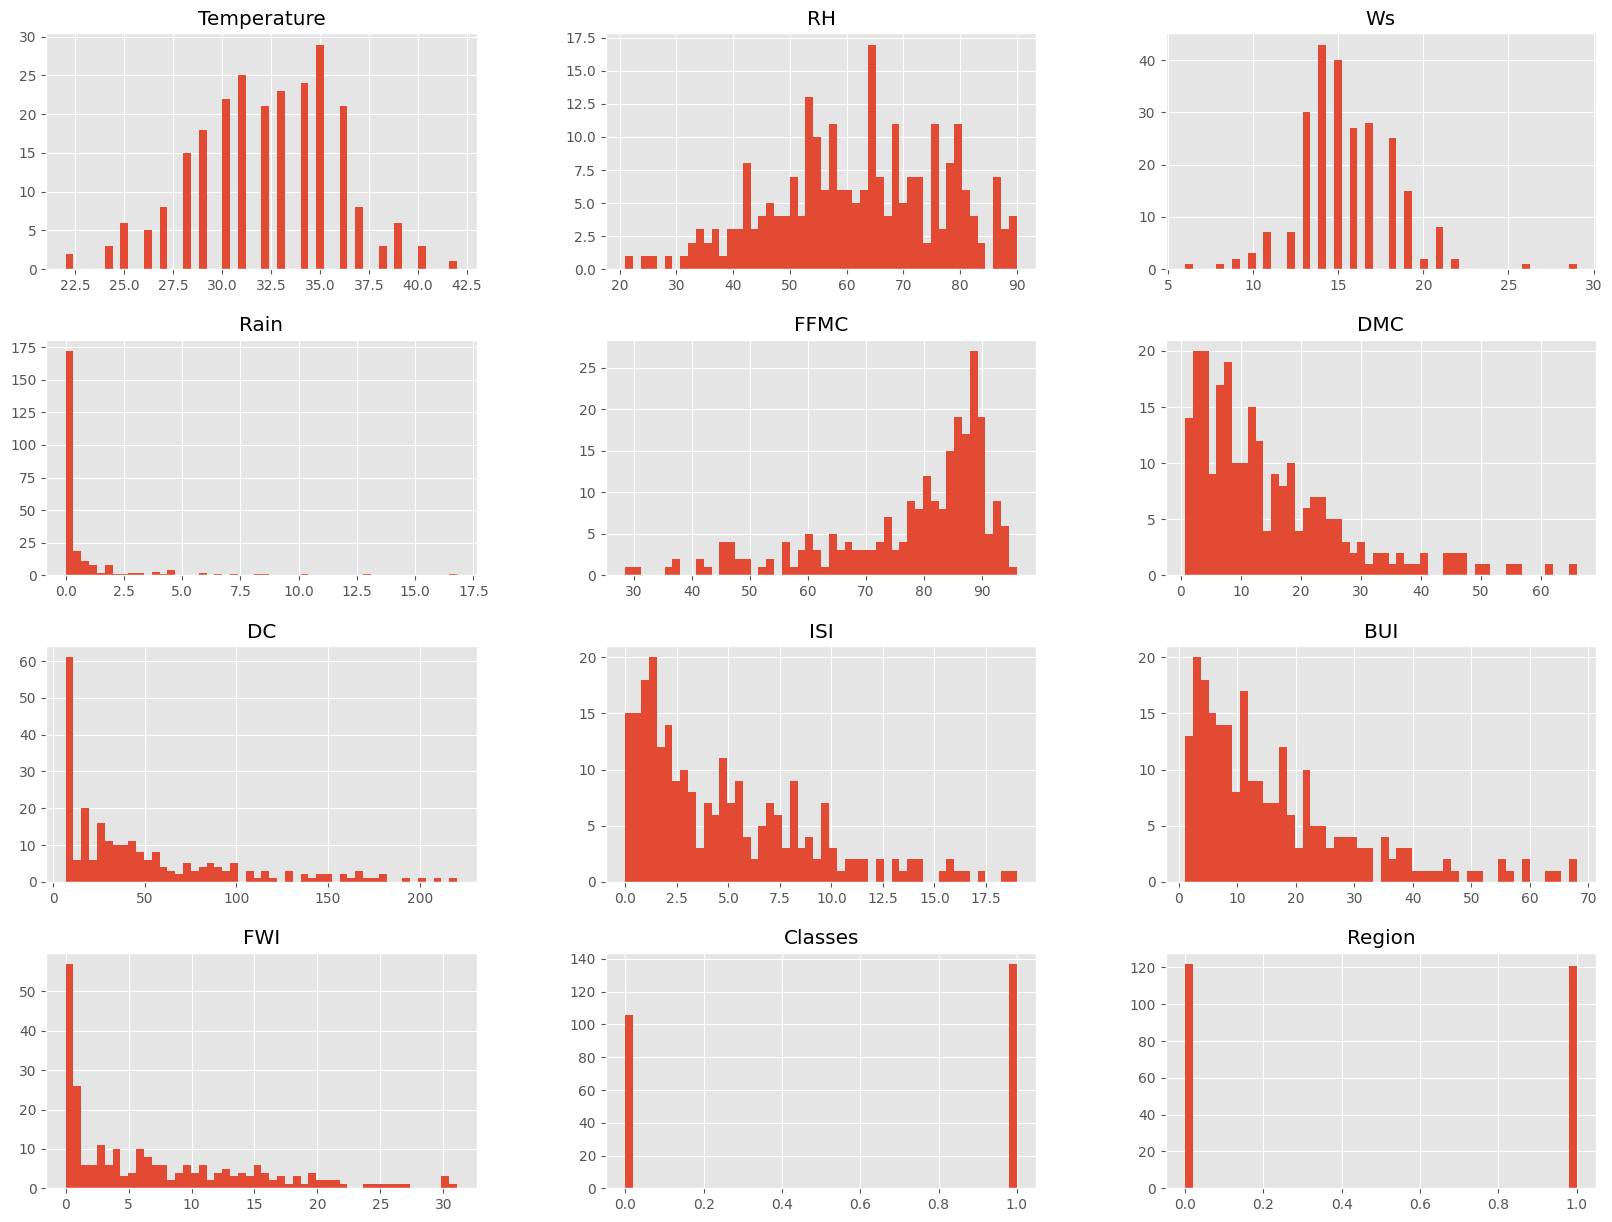

In [ ]:
plt.style.use('ggplot')
df_copy2.hist(bins = 50, figsize=(20,15))
plt.show()

In [ ]:
percentage = df_copy2["Classes"].value_counts(normalize = True) * 100

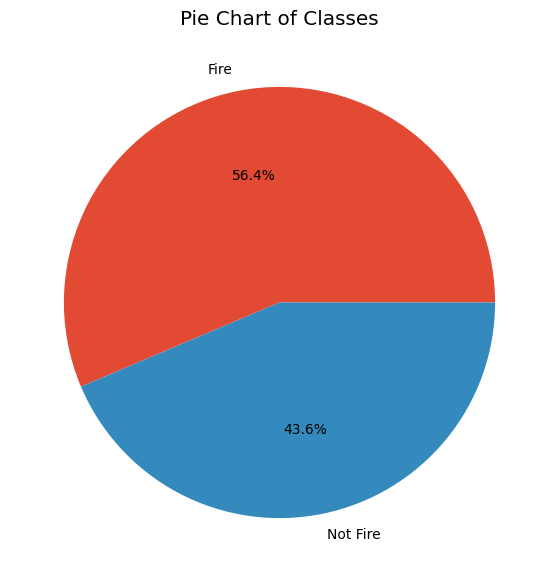

In [ ]:
classlabels = ["Fire" , "Not Fire"]
plt.figure(figsize = (12,7))
plt.pie(percentage, labels=classlabels, autopct = "%1.1f%%")
plt.title("Pie Chart of Classes")
plt.show()

In [ ]:
df_copy2.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

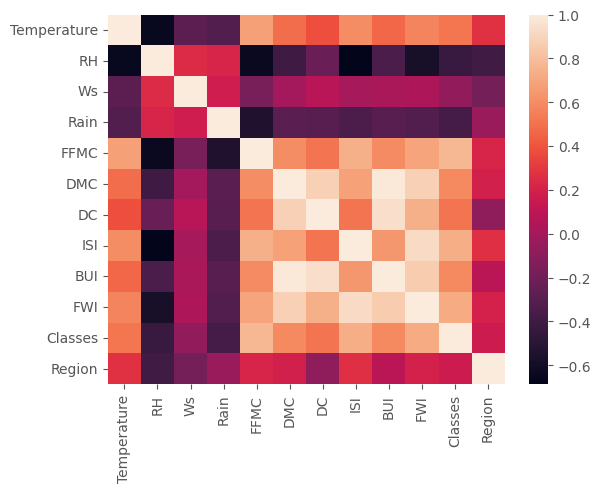

In [ ]:
sns.heatmap(df_copy2.corr())

<Axes: ylabel='FWI'>

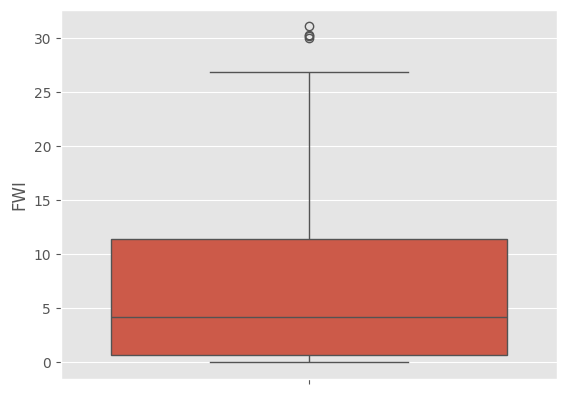

In [ ]:
sns.boxplot(df['FWI'])

Text(0.5, 1.0, 'Fire Analysis of Sidi-Bel Abbes Regions')

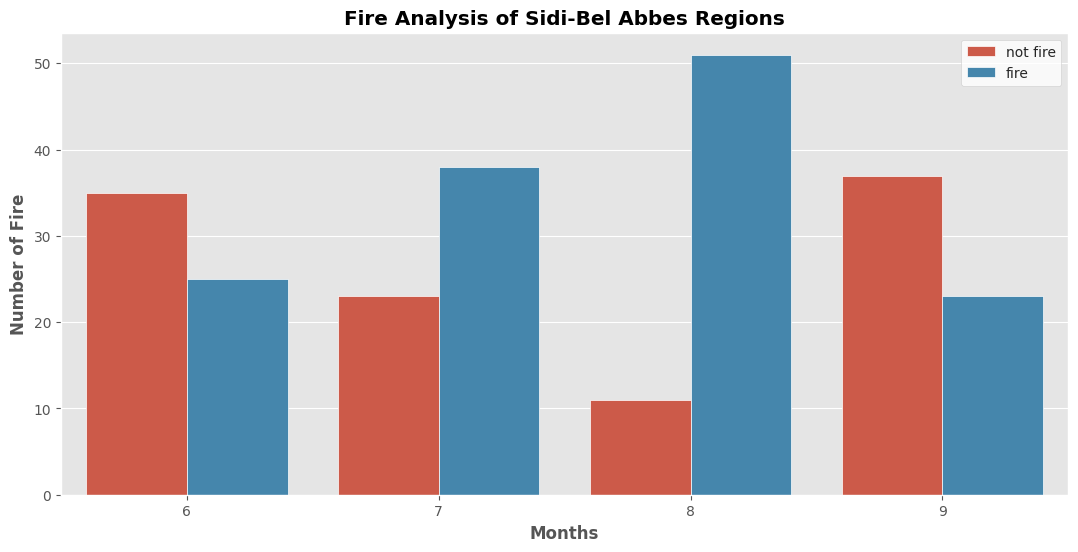

In [ ]:
dftemp = df.loc[df["Region"] == 1]
plt.subplots(figsize = (13,6))
sns.set_style("whitegrid")
sns.countplot(x = 'month', hue = np.where(df['Classes'].str.contains('not fire'), "not fire", "fire"), data = df)
plt.ylabel("Number of Fire", weight = "bold")
plt.xlabel("Months", weight = "bold")
plt.title("Fire Analysis of Sidi-Bel Abbes Regions", weight ="bold")

Text(0.5, 1.0, 'Fire Analysis of Bejaia Regions')

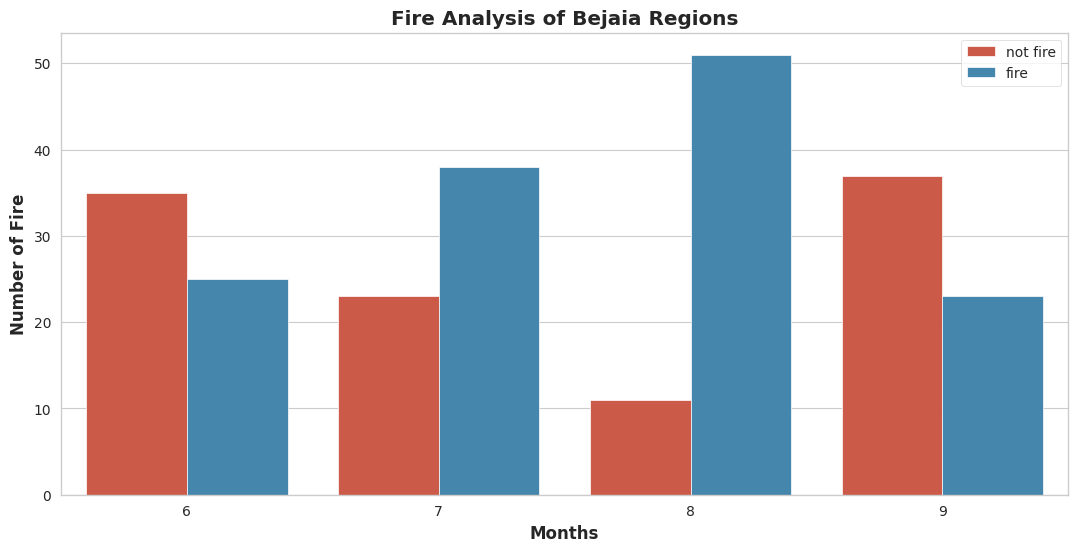

In [ ]:
dftemp = df.loc[df["Region"] == 0]
plt.subplots(figsize = (13,6))
sns.set_style("whitegrid")
sns.countplot(x = 'month', hue = np.where(df['Classes'].str.contains('not fire'), "not fire", "fire"), data = df)
plt.ylabel("Number of Fire", weight = "bold")
plt.xlabel("Months", weight = "bold")
plt.title("Fire Analysis of Bejaia Regions", weight ="bold")

# **Features selection**

In [ ]:
X = df_copy2.drop("FWI", axis = 1)
y = df_copy2['FWI']

In [ ]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [ ]:
y.head()

,FWI
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state = 42)

In [ ]:
print(f"X_train{X_train.shape}, X_test:{X_test.shape} ")

X_train(182, 11), X_test:(61, 11) 


In [ ]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

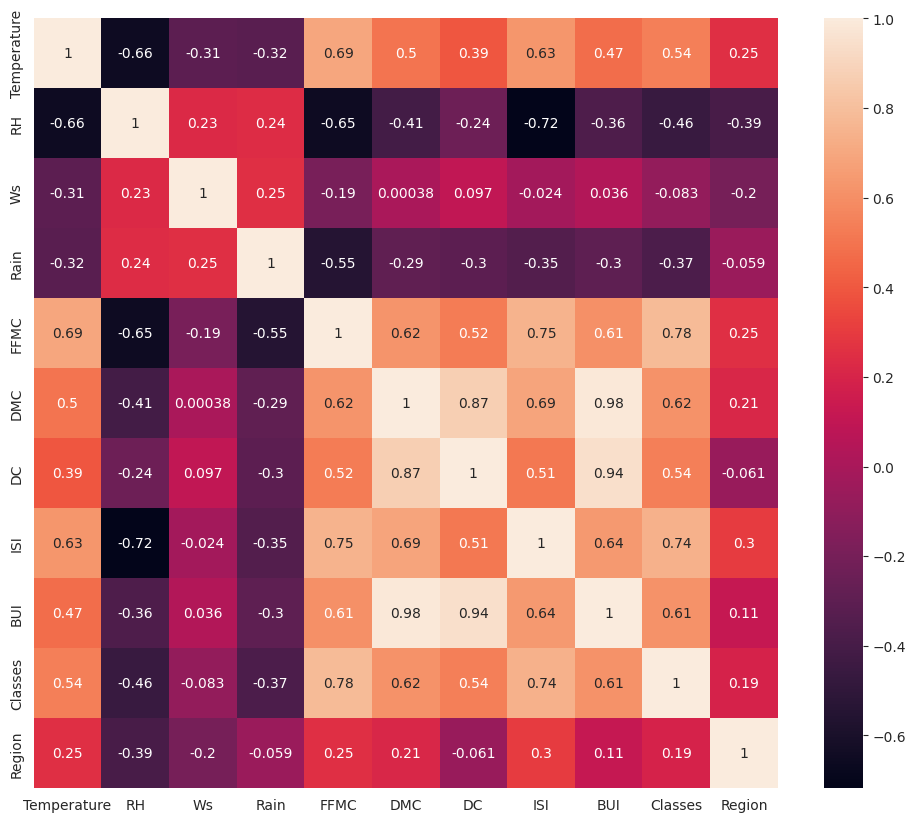

In [ ]:
plt.figure(figsize = (12,10))
corr = X_train.corr()
sns.heatmap(corr, annot = True)

In [ ]:
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
corr_features = correlation(X_train, 0.85)

In [ ]:
X_train.drop(corr_features, axis = 1, inplace = True)
X_test.drop(corr_features, axis = 1, inplace = True)


In [ ]:
print(f"X_train{X_train.shape}, X_test:{X_test.shape} ")

X_train(182, 9), X_test:(61, 9) 


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Box plot on standard scaler**

Text(0.5, 1.0, 'X_train after Standard scaler')

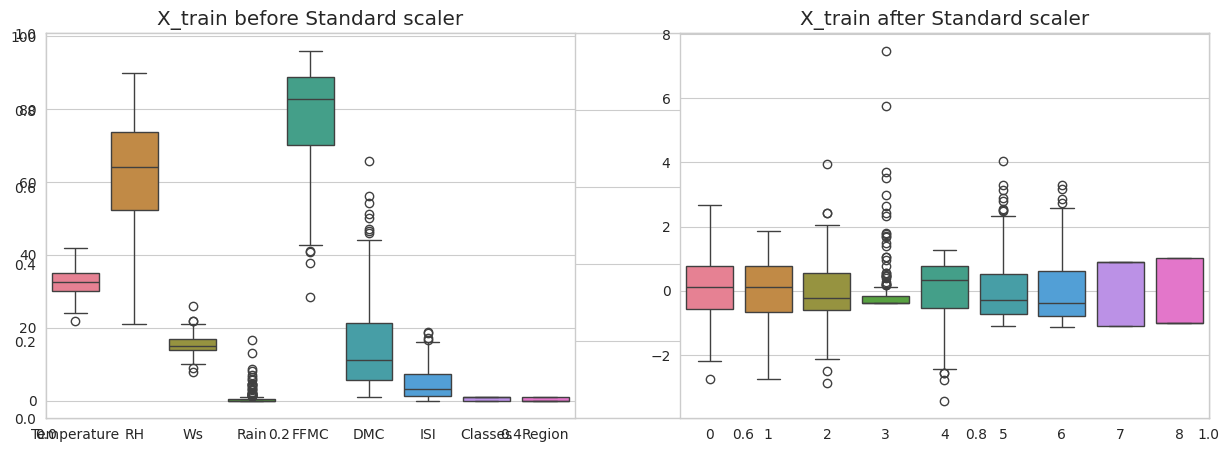

In [ ]:
plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title("X_train before Standard scaler")
plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)
plt.title("X_train after Standard scaler")


In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred_linreg = linreg.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
Lin_reg_mse = mean_squared_error(y_test, y_pred_linreg)
Lin_reg_mae = mean_absolute_error(y_test, y_pred_linreg)
Lin_reg_rmse = np.sqrt(Lin_reg_mse)
Lin_reg_score = r2_score(y_test, y_pred_linreg)
print(f'{Lin_reg_mse},{Lin_reg_mae},{Lin_reg_rmse},{Lin_reg_score}')

0.6742766873791607,0.5468236465249986,0.8211435242265268,0.9847657384266951


In [ ]:
Prediction_comparison = pd.DataFrame({
    "Predict": y_pred_linreg,
    "Actual": y_test
})
Prediction_comparison

,Predict,Actual
24,8.223405,8.4
6,7.752529,7.2
152,-0.254117,0.5
232,4.355893,3.8
238,6.691359,6.5
...,...,...
162,0.642051,0.8
178,9.017026,9.0
224,3.627332,3.9
230,14.617082,15.4


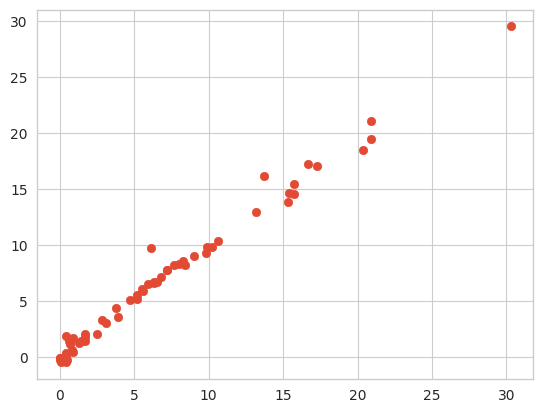

In [ ]:
plt.scatter(y_test, y_pred_linreg)

In [ ]:
residuals = y_test - y_pred_linreg
print(residuals)

24     0.176595
6     -0.552529
152    0.754117
232   -0.555893
238   -0.191359
         ...   
162    0.157949
178   -0.017026
224    0.272668
230    0.782918
154    0.019510
Name: FWI, Length: 61, dtype: float64


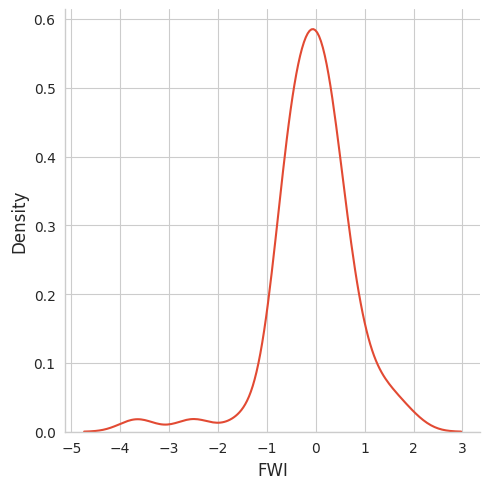

In [ ]:
sns.displot(residuals, kind = 'kde')

# **Lasso Regression**

In [ ]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv = 5)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
lasso_rmse = np.sqrt(lasso_mse)
lasso_score = r2_score(y_test, y_pred_lasso)
print(f'{lasso_mse},{lasso_mae},{lasso_rmse},{lasso_score}')

0.792499555474362,0.619970115826343,0.8902244410677355,0.9820946715928275


In [ ]:
Prediction_comparison = pd.DataFrame({
    "Predict": y_pred_lasso,
    "Actual": y_test
})
Prediction_comparison

,Predict,Actual
24,8.174906,8.4
6,7.683125,7.2
152,-0.256765,0.5
232,4.726434,3.8
238,6.787158,6.5
...,...,...
162,0.990564,0.8
178,9.087373,9.0
224,3.844560,3.9
230,14.439912,15.4


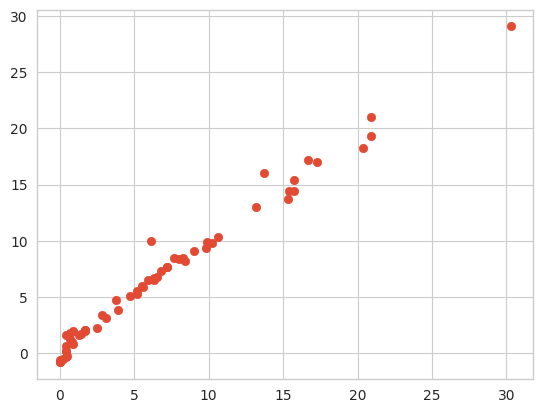

In [ ]:
plt.scatter(y_test, y_pred_lasso)

In [ ]:
lasso.alpha_

np.float64(0.05725391318234408)

24     0.225094
6     -0.483125
152    0.756765
232   -0.926434
238   -0.287158
         ...   
162   -0.190564
178   -0.087373
224    0.055440
230    0.960088
154   -0.030341
Name: FWI, Length: 61, dtype: float64


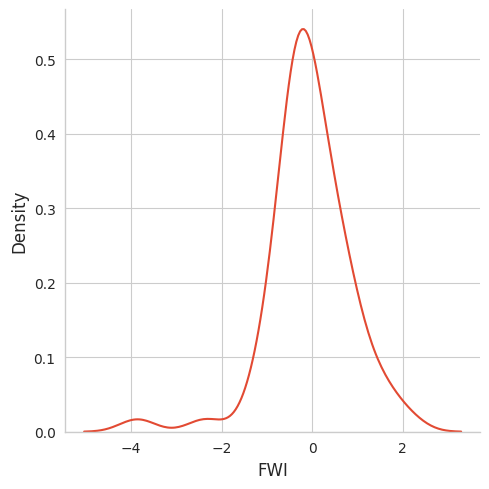

In [ ]:
residuals_lasso = y_test - y_pred_lasso
print(residuals_lasso)
sns.displot(residuals_lasso, kind = 'kde')

### **Ridge Regression**

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:

ridge = RidgeCV(cv = 5)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(ridge_mse)
ridge_score = r2_score(y_test, y_pred_lasso)
print(f'{ridge_mse},{ridge_mae},{ridge_rmse},{ridge_score}')

0.6949198918152074,0.5642305340105692,0.8336185529456548,0.9820946715928275


24     0.163040
6     -0.571335
152    0.705764
232   -0.586417
238   -0.230149
         ...   
162    0.095802
178   -0.051078
224    0.223953
230    0.768130
154   -0.070508
Name: FWI, Length: 61, dtype: float64


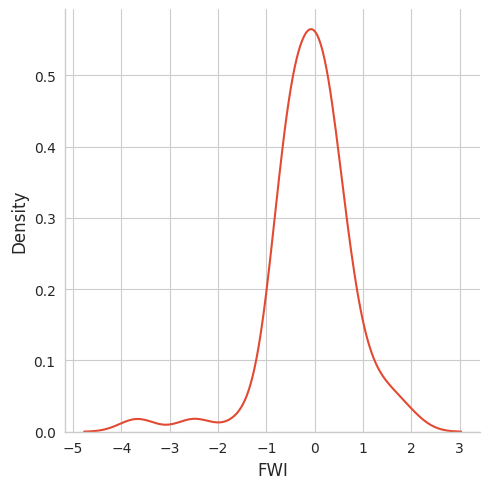

In [ ]:
residuals_ridge = y_test - y_pred_ridge
print(residuals_ridge)
sns.displot(residuals_ridge, kind = 'kde')

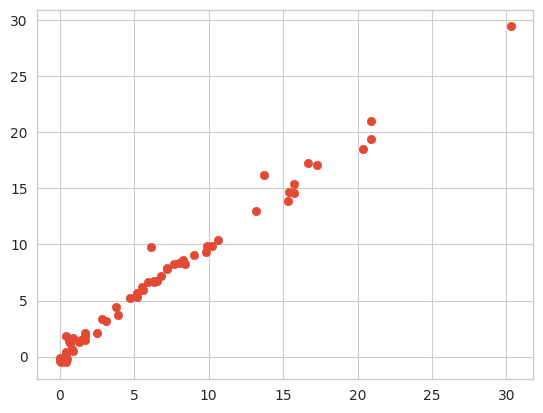

In [ ]:
plt.scatter(y_test, y_pred_ridge)

In [ ]:
Prediction_comparison = pd.DataFrame({
    "Predict": y_pred_ridge,
    "Actual": y_test
})
Prediction_comparison

,Predict,Actual
24,8.236960,8.4
6,7.771335,7.2
152,-0.205764,0.5
232,4.386417,3.8
238,6.730149,6.5
...,...,...
162,0.704198,0.8
178,9.051078,9.0
224,3.676047,3.9
230,14.631870,15.4


In [ ]:
ridge.alpha_

np.float64(1.0)

In [ ]:
ridge.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

### **ElasticNet Regression**

In [ ]:
from sklearn.linear_model import ElasticNetCV


In [ ]:
elasticnet = ElasticNetCV(cv= 5)
elasticnet.fit(X_train_scaled, y_train)
y_pred_elasticnet = elasticnet.predict(X_test_scaled)
elasticnet_mse = mean_squared_error(y_test, y_pred_elasticnet)
elasticnet_mae = mean_absolute_error(y_test, y_pred_elasticnet)
elasticnet_rmse = np.sqrt(elasticnet_mse)
elasticnet_score = r2_score(y_test, y_pred_elasticnet)
print(f'{elasticnet_mse},{elasticnet_mae},{elasticnet_rmse},{elasticnet_score}')

0.8222830416276258,0.6575946731430898,0.906798236449336,0.9814217587854941


In [ ]:
Prediction_comparison = pd.DataFrame({
    "Predict": y_pred_elasticnet,
    "Actual": y_test
})
Prediction_comparison

,Predict,Actual
24,8.268963,8.4
6,7.804990,7.2
152,-0.103735,0.5
232,4.591000,3.8
238,6.887253,6.5
...,...,...
162,0.994937,0.8
178,9.164863,9.0
224,3.914480,3.9
230,14.577311,15.4


24     0.131037
6     -0.604990
152    0.603735
232   -0.791000
238   -0.387253
         ...   
162   -0.194937
178   -0.164863
224   -0.014480
230    0.822689
154   -0.300929
Name: FWI, Length: 61, dtype: float64


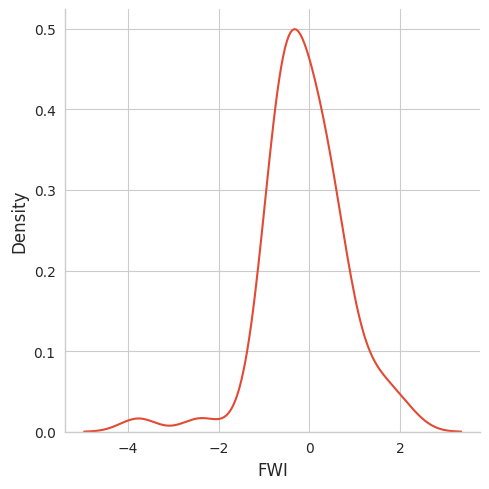

In [ ]:
residuals_elasticnet = y_test - y_pred_elasticnet
print(residuals_elasticnet)
sns.displot(residuals_elasticnet, kind = 'kde')

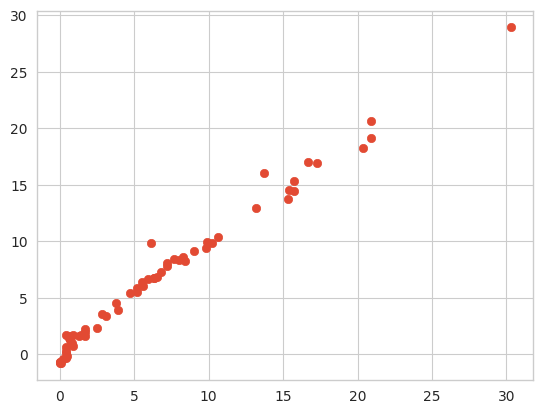

In [ ]:
plt.scatter(y_test, y_pred_elasticnet)

In [ ]:
elasticnet.alpha_

np.float64(0.04311146156383891)

In [ ]:
import pickle
pickle.dump(scaler, open("scaler.pkl", "wb"))
pickle.dump(elasticnet, open("elasticnet.pkl", "wb"))